# To predict the Churn of a customer for given Telecommunication data

**Objective: ** To find the whether the customer will churn or not for a given customized set of inputs
    
1. Impact of Unbalanced datasets on performance of model predctions.
2. Finding the churn of a customer with different models like KNN, SVC with RBF kernel, Random Forest and observations of difference in performances.
3. Finding Important Features.
4. Function to predict the Churn of a customer for given customized input.

**Load data to a Pandas DataFrame**

In [76]:
import pandas as pd
churn = pd.read_csv(r"C:\Users\Harika\Downloads\churn1.csv")
churn.shape
print("Dataframe details:\n", churn.head())

Dataframe details:
   State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         

In [77]:
print("Counts for each class:\n", churn['Churn'].value_counts())

Counts for each class:
 False.    2850
True.      483
Name: Churn, dtype: int64


**Detailed Information of the Input Data**

In [78]:
print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB
None


In [79]:
#List of columns in dataset
col_names = list(churn.columns)
print("List of column names in dataset:\n", col_names)

List of column names in dataset:
 ['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn']


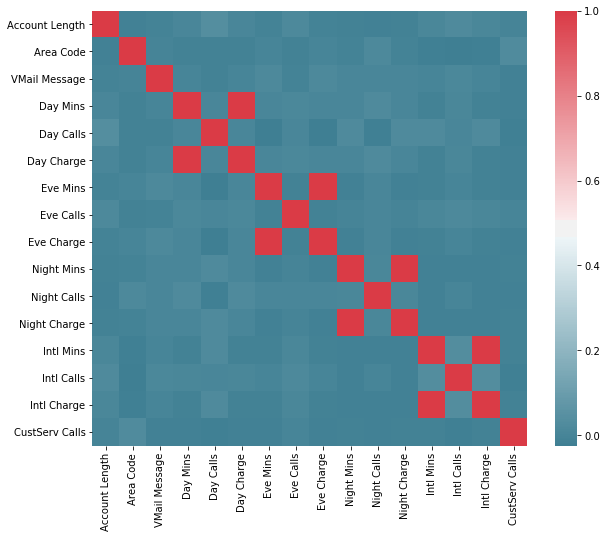

In [80]:
#Heatmap to find Correlation of variables
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = churn.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

**Observations**

1.Charge for a cal and Minutes of call are positively correlated with each other

2.(Day Charge, Day Mins) , (Eve Charge, Eve Mins), (Night Charge, Night Mins), (Intl Charge, Intl Mins) are positively correlated

In [81]:
#Creating dataframe to store class labels
df_class_label = churn['Churn']
print("Shape of class label dataframe: ",df_class_label.shape)

#Converting Churn Class label in to Numpy array by removing trailing '.' from the values
def remtrail(dataframe):
    churn_class_label = np.array(dataframe)
    churn_cl = np.array([i[:-1] for i in churn_class_label])
    return churn_cl


Shape of class label dataframe:  (3333,)


In [82]:
#Dropping 'Phone', 'Churn' columns as 'phone' doesnt add any value while training model and Churn is the Class label
cols_to_drop = ['Phone', 'Churn']
churn_final = churn.drop(cols_to_drop,axis=1)
print("Shape of Dataframe after dropping columns: ",churn_final.shape)

Shape of Dataframe after dropping columns:  (3333, 19)


In [83]:
#Finding Categorial columns in the dataset
churn_categorical =   churn_final.select_dtypes(include=[object])
print("Categorail columns present in dataset:\n", churn_categorical)

Categorail columns present in dataset:
      State Int'l Plan VMail Plan
0       KS         no        yes
1       OH         no        yes
2       NJ         no         no
3       OH        yes         no
4       OK        yes         no
5       AL        yes         no
6       MA         no        yes
7       MO        yes         no
8       LA         no         no
9       WV        yes        yes
10      IN         no         no
11      RI         no         no
12      IA         no         no
13      MT         no         no
14      IA         no         no
15      NY         no         no
16      ID         no        yes
17      VT         no         no
18      VA         no        yes
19      TX         no         no
20      FL         no         no
21      CO         no         no
22      AZ         no         no
23      SC         no         no
24      VA         no         no
25      NE         no         no
26      WY         no        yes
27      MT         no         no
28 

In [84]:
#Converting categorail columns "Int'l Plan","VMail Plan" into Boolean values inorder to pass into model
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_final[yes_no_cols] = churn_final[yes_no_cols] == 'yes'
print("Head of dataframe after converting to boolean values for 2 columns:\n", churn_final.head())


Head of dataframe after converting to boolean values for 2 columns:
   State  Account Length  Area Code  Int'l Plan  VMail Plan  VMail Message  \
0    KS             128        415       False        True             25   
1    OH             107        415       False        True             26   
2    NJ             137        415       False       False              0   
3    OH              84        408        True       False              0   
4    OK              75        415        True       False              0   

   Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   
2     243.4        114       41.38     121.2        110       10.30   
3     299.4         71       50.90      61.9         88        5.26   
4     166.7        113       28.34     148.3        122       12.61   

   Night Mins  Night Calls  Night Charge 

**One Hot Encoding to convert 'State' Categorial value to a Numerical vector of dimensions equal to no. of categories of State variable**

In [85]:
print('Churn data size before One Hot encoding: ',churn_final.shape)
print('*' * 100)
print('No of unique states in State variable: ',churn_final['State'].nunique())
print('*' * 100)

#Give the feature and columns to one hot encode in 'columns' and column rename prefix in 'prefix'
churn_dumm=pd.get_dummies(churn_final, columns=["State"], prefix=["State"])
print("Head of dataframe after Response encoding:\n", churn_dumm.head())
print('*' * 100)
print('Churn data size after Response encoding: ',churn_dumm.shape)
print('*' * 100)

#converting to numpy matrix
import numpy as np
churn_array = np.array(churn_dumm)
print("Shape of Churn Matrix", churn_array.shape)

Churn data size before One Hot encoding:  (3333, 19)
****************************************************************************************************
No of unique states in State variable:  51
****************************************************************************************************
Head of dataframe after Response encoding:
    Account Length  Area Code  Int'l Plan  VMail Plan  VMail Message  Day Mins  \
0             128        415       False        True             25     265.1   
1             107        415       False        True             26     161.6   
2             137        415       False       False              0     243.4   
3              84        408        True       False              0     299.4   
4              75        415        True       False              0     166.7   

   Day Calls  Day Charge  Eve Mins  Eve Calls    ...     State_SD  State_TN  \
0        110       45.07     197.4         99    ...            0         0   
1        123 

**Standarization of data to make Scale Independent**

In [87]:
#Standardize the data by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
def standardization(array):  
    scaler = StandardScaler()
#Fit to data, then transform it.
    churn_stand_data = scaler.fit_transform(array)
    return churn_stand_data

In [88]:
#Call Standardization function
churn_stand_data = standardization(churn_array)
print("Shape of Standardized data", churn_stand_data.shape)

Shape of Standardized data (3333, 69)


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [92]:
# Splitiing of data to test and train
from sklearn.cross_validation import train_test_split
def split_data(x,y):
    train_data,test_data, train_label, test_label = train_test_split(x, y, test_size=.15,random_state=42)
    return train_data, test_data, train_label, test_label

In [97]:
churn_lab = remtrail(df_class_label)
print("Shape of class label", churn_lab.shape)

#Call train_test_split function
train_data, test_data, train_label, test_label = split_data(churn_stand_data, churn_lab)
print("Shape of train_data", train_data.shape)
print("Shape of train_label", train_label.shape)
print("Shape of test_data", test_data.shape)
print("Shape of test_label", test_label.shape)

Shape of class label (3333,)
Shape of train_data (2833, 69)
Shape of train_label (2833,)
Shape of test_data (500, 69)
Shape of test_label (500,)


**Base Model: KNN**

GridSearchCV to find optimal Nearest Neighbours

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

clf_knn = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv =10, n_jobs = -1, scoring = 'accuracy')
clf_knn.fit(train_data, train_label)

print("Classifier with optimal nearest Neighbours:\n", clf_knn.best_estimator_)
print('*' * 100)
#print("Grid Scores \n", clf.grid_scores_)
#print('*' * 100)
print("Best Score with optimal nearest Neighbours: ", clf_knn.best_score_)
print('*' * 100)
print("Optimal nearest Neighbours are: ", clf_knn.best_params_)
print('*' * 100)
#Calculate metrics
print("Accuracy score obtained on Test data is: ", clf_knn.score(test_data, test_label))

Classifier with optimal nearest Neighbours:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
****************************************************************************************************
Best Score with optimal nearest Neighbours:  0.8595128838686904
****************************************************************************************************
Optimal nearest Neighbours are:  {'n_neighbors': 7}
****************************************************************************************************
Accuracy score obtained on Test data is:  0.842


In [99]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf_knn1 = KNeighborsClassifier(n_neighbors = 7, n_jobs = -1)
clf_knn1.fit(train_data, train_label)
pred_knn = clf_knn1.predict(test_data)

# Calculate Confusion matrix
mat = confusion_matrix(test_label, pred_knn)
print("Confusion Matrix\n", mat)
tn, fp, fn, tp = mat.ravel()
print("True Negative: ", tn)
print("Flase Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print('*' * 100)

# Calculate Precision Score
pre = precision_score(test_label, pred_knn, pos_label = 'True', average = 'binary')
print('Precision for optimal Parameters is: ', pre)
print('*' * 100)

# Calculate Recall Score
rec = recall_score(test_label, pred_knn, pos_label = 'True', average = 'binary')
print('Recall Score for optimal Parameters is: ', rec)
print('*' * 100)

# Calculate f1 Score
f1 = f1_score(test_label, pred_knn, pos_label = 'True', average = 'binary')
print('f1 Score for Optimal Parameters is: ', f1)
acc = accuracy_score(test_label,pred_knn)
print('*' * 100)
print("Accuracy for Otimal Parameters is: ", acc)

Confusion Matrix
 [[419   3]
 [ 76   2]]
True Negative:  419
Flase Positive:  3
False Negative:  76
True Positive:  2
****************************************************************************************************
Precision for optimal Parameters is:  0.4
****************************************************************************************************
Recall Score for optimal Parameters is:  0.02564102564102564
****************************************************************************************************
f1 Score for Optimal Parameters is:  0.048192771084337345
****************************************************************************************************
Accuracy for Otimal Parameters is:  0.842


**Observation**

1. Out of 500 test values 421 values were predicted Correctly, hence accuracy is 84.2% which is reasonable good.
2. Out of correctly predicted 421 values, 419 values belongs to 'False' Category. That means only 2 were predicted correctly as 'True' out of 78 'True' test values which is very bad. It results in false predictions of not churning a customer even if the ground truth of customer churning.

**Balancing of datset**

In [109]:
#Add Churn Column to churn_dumm dataframe
churn_dumm['Churn'] = churn['Churn']
print(churn_dumm.shape)

(3333, 70)


**Upsampling**

In [110]:
from sklearn.utils import resample
import pandas as pd
print("counts of each class before upsampling:\n", churn['Churn'].value_counts())
print('*' * 100)

df_majority = churn_dumm[churn_dumm.Churn == 'False.']
df_minority = churn_dumm[churn_dumm.Churn == 'True.']
print('Shape of majority class', df_majority.shape)
print('*' * 100)
print('Shape of minority class', df_minority.shape)
print('*' * 100)
df_minority_upsample = resample(df_minority, replace = True, n_samples = 2850, random_state = 42)
print('Shape of upsampled minority class', df_minority_upsample.shape)
print('*' * 100)
frames = [df_majority, df_minority_upsample]
df_balance = pd.concat(frames)
print("Shape of Balanced dataset", df_balance.shape)
print('*' * 100)
print("Counts for each value\n", df_balance['Churn'].value_counts())

counts of each class before upsampling:
 False.    2850
True.      483
Name: Churn, dtype: int64
****************************************************************************************************
Shape of majority class (2850, 70)
****************************************************************************************************
Shape of minority class (483, 70)
****************************************************************************************************
Shape of upsampled minority class (2850, 70)
****************************************************************************************************
Shape of Balanced dataset (5700, 70)
****************************************************************************************************
Counts for each value
 False.    2850
True.     2850
Name: Churn, dtype: int64


In [111]:
df_churn_bal = df_balance['Churn']
df_bal = df_balance.drop(labels = 'Churn', axis = 1)
# Call Remtrail function to remove trailing '.' from class label
churn_lab_balance = remtrail(df_churn_bal)
print("Shape of Balanced class label", churn_lab_balance.shape)
#Convert balanced dataframe to array to pass thoriugh model
churn_array_balance = np.array(df_bal)

#Call Standardization function
churn_stand_bal = standardization(churn_array_balance)
print("Shape of balanced array", churn_stand_bal.shape)

#Call Splitting function
train_data_bal, test_data_bal, train_label_bal, test_label_bal = split_data(churn_stand_bal, churn_lab_balance)
print("Shape of Train data", train_data_bal.shape)
print("Shape of Test data", test_data_bal.shape)
print("Shape of train Class label", train_label_bal.shape)
print("Shape of test Class label", test_label_bal.shape)

Shape of Balanced class label (5700,)
Shape of balanced array (5700, 69)
Shape of Train data (4845, 69)
Shape of Test data (855, 69)
Shape of train Class label (4845,)
Shape of test Class label (855,)


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Basic Model - KNN Classifier on Balanced dataset**

GridSearchCV to find optimal nearest neughbors

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

clf_knn_bal = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv =10, n_jobs = -1, scoring = 'accuracy')
clf_knn_bal.fit(train_data_bal, train_label_bal)

print("Classifier with optimal nearest Neighbours:\n", clf_knn_bal.best_estimator_)
print('*' * 100)
#print("Grid Scores \n", clf.grid_scores_)
#print('*' * 100)
print("Best Score with optimal nearest Neighbours: ", clf_knn_bal.best_score_)
print('*' * 100)
print("Optimal nearest Neighbours are: ", clf_knn_bal.best_params_)
print('*' * 100)
#Calculate metrics
print("Accuracy score obtained on Test data is: ", clf_knn_bal.score(test_data_bal, test_label_bal))

Classifier with optimal nearest Neighbours:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
****************************************************************************************************
Best Score with optimal nearest Neighbours:  0.9547987616099072
****************************************************************************************************
Optimal nearest Neighbours are:  {'n_neighbors': 1}
****************************************************************************************************
Accuracy score obtained on Test data is:  0.960233918128655


**KNN classifier with n_neighbors = 1 on Balanced dataset**

In [113]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf_knn1_bal = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
clf_knn1_bal.fit(train_data_bal, train_label_bal)
pred_knn_bal = clf_knn1_bal.predict(test_data_bal)

# Calculate Confusion matrix
mat = confusion_matrix(test_label_bal, pred_knn_bal)
print("Confusion Matrix\n", mat)
tn, fp, fn, tp = mat.ravel()
print("True Negative: ", tn)
print("Flase Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print('*' * 100)

# Calculate Precision Score
pre = precision_score(test_label_bal, pred_knn_bal, pos_label = 'True', average = 'binary')
print('Precision for optimal Parameters is: ', pre)
print('*' * 100)

# Calculate Recall Score
rec = recall_score(test_label_bal, pred_knn_bal, pos_label = 'True', average = 'binary')
print('Recall Score for optimal Parameters is: ', rec)
print('*' * 100)

# Calculate f1 Score
f1 = f1_score(test_label_bal, pred_knn_bal, pos_label = 'True', average = 'binary')
print('f1 Score for Optimal Parameters is: ', f1)
acc = accuracy_score(test_label_bal,pred_knn_bal)
print('*' * 100)
print("Accuracy for Otimal Parameters is: ", acc)

Confusion Matrix
 [[406  33]
 [  1 415]]
True Negative:  406
Flase Positive:  33
False Negative:  1
True Positive:  415
****************************************************************************************************
Precision for optimal Parameters is:  0.9263392857142857
****************************************************************************************************
Recall Score for optimal Parameters is:  0.9975961538461539
****************************************************************************************************
f1 Score for Optimal Parameters is:  0.9606481481481481
****************************************************************************************************
Accuracy for Otimal Parameters is:  0.960233918128655


**Observations**

1. With Balanced dataset Accuracy increased to 96% and even prediction of 'True' values is much better with f1 score of 96%.
2. Anyways it is a basic model will try with different models.

**Grid SearchCV to find Optimal Parameters in SVM RBF**

In [114]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'C': [0.0001,0.001, 0.01,0.1, 1, 10, 100, 1000],
                    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_rbf = GridSearchCV(SVC(kernel = 'rbf'), tuned_parameters, cv =10, n_jobs = -1, scoring = 'accuracy')
clf_rbf.fit(train_data, train_label)

print("Classifier with optimal 'C', gamma values is:\n", clf_rbf.best_estimator_)
print('*' * 100)
#print("Grid Scores \n", clf.grid_scores_)
#print('*' * 100)
print("Best Score with optimal 'C', 'gamma values is: ", clf_rbf.best_score_)
print('*' * 100)
print("Optimal Parameters are: ", clf_rbf.best_params_)
print('*' * 100)
#Calculate metrics
print("Accuracy score obtained on Test data is: ", clf_rbf.score(test_data, test_label))

Classifier with optimal 'C', gamma values is:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
****************************************************************************************************
Best Score with optimal 'C', 'gamma values is:  0.8905753618072715
****************************************************************************************************
Optimal Parameters are:  {'C': 100, 'gamma': 0.001}
****************************************************************************************************
Accuracy score obtained on Test data is:  0.898


**SVC Classifier with RBF Kernel using Optimal Hyper Parameters**

In [115]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

model = SVC(C = 100 , gamma = 0.001, kernel = 'rbf')
model.fit(train_data, train_label)
pred = model.predict(test_data)

# Calculate Confusion matrix
mat = confusion_matrix(test_label, pred)
print("Confusion Matrix\n", mat)
tn, fp, fn, tp = mat.ravel()
print("True Negative: ", tn)
print("Flase Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print('*' * 100)
# Calculate Precision Score
pre = precision_score(test_label, pred, pos_label = 'True', average = 'binary')
print('Precision for optimal Parameters is: ', pre)
print('*' * 100)
# Calculate Recall Score
rec = recall_score(test_label, pred, pos_label = 'True', average = 'binary')
print('Recall Score for optimal Parameters is: ', rec)
print('*' * 100)
# Calculate f1 Score
f1 = f1_score(test_label, pred, pos_label = 'True', average = 'binary')
print('f1 Score for Optimal Parameters is: ', f1)
acc = accuracy_score(test_label,pred)
print('*' * 100)
print("Accuracy for Otimal Parameters is: ", acc)

Confusion Matrix
 [[416   6]
 [ 45  33]]
True Negative:  416
Flase Positive:  6
False Negative:  45
True Positive:  33
****************************************************************************************************
Precision for optimal Parameters is:  0.8461538461538461
****************************************************************************************************
Recall Score for optimal Parameters is:  0.4230769230769231
****************************************************************************************************
f1 Score for Optimal Parameters is:  0.5641025641025641
****************************************************************************************************
Accuracy for Otimal Parameters is:  0.898


**Observations**

1.Performance is better than KNN with unbalanced dataset but less than KNN with Balancd dataset. Will try with Balanced dataset.

**Grid searchCV on SVC RBF Kernel with balanced dataset**

In [127]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'C': [0.0001,0.001, 0.01,0.1, 1, 10, 100, 1000],
                    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_rbf_bal = GridSearchCV(SVC(kernel = 'rbf'), tuned_parameters, cv =10, n_jobs = -1, scoring = 'accuracy')
clf_rbf_bal.fit(train_data_bal, train_label_bal)

print("Classifier with optimal 'C', gamma values is:\n", clf_rbf_bal.best_estimator_)
print('*' * 100)
#print("Grid Scores \n", clf.grid_scores_)
#print('*' * 100)
print("Best Score with optimal 'C', 'gamma values is: ", clf_rbf_bal.best_score_)
print('*' * 100)
print("Optimal Parameters are: ", clf_rbf_bal.best_params_)
print('*' * 100)
#Calculate metrics
print("Accuracy score obtained on Test data is: ", clf_rbf_bal.score(test_data_bal, test_label_bal))

Classifier with optimal 'C', gamma values is:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
****************************************************************************************************
Best Score with optimal 'C', 'gamma values is:  0.9962848297213622
****************************************************************************************************
Optimal Parameters are:  {'C': 1, 'gamma': 1}
****************************************************************************************************
Accuracy score obtained on Test data is:  0.9964912280701754


**SVC RBF Kernel with optimal Parameters on Balanced datset**

In [130]:
model_bal = SVC(C = 1 , gamma = 1, kernel = 'rbf')
model_bal.fit(train_data_bal, train_label_bal)
pred = model_bal.predict(test_data_bal)

# Calculate Confusion matrix
mat = confusion_matrix(test_label_bal, pred)
print("Confusion Matrix\n", mat)
tn, fp, fn, tp = mat.ravel()
print("True Negative: ", tn)
print("Flase Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print('*' * 100)
# Calculate Precision Score
pre = precision_score(test_label_bal, pred, pos_label = 'True', average = 'binary')
print('Precision for optimal Parameters is: ', pre)
print('*' * 100)
# Calculate Recall Score
rec = recall_score(test_label_bal, pred, pos_label = 'True', average = 'binary')
print('Recall Score for optimal Parameters is: ', rec)
print('*' * 100)
# Calculate f1 Score
f1 = f1_score(test_label_bal, pred, pos_label = 'True', average = 'binary')
print('f1 Score for Optimal Parameters is: ', f1)
acc = accuracy_score(test_label_bal,pred)
print('*' * 100)
print("Accuracy for Otimal Parameters is: ", acc)

Confusion Matrix
 [[439   0]
 [  3 413]]
True Negative:  439
Flase Positive:  0
False Negative:  3
True Positive:  413
****************************************************************************************************
Precision for optimal Parameters is:  1.0
****************************************************************************************************
Recall Score for optimal Parameters is:  0.9927884615384616
****************************************************************************************************
f1 Score for Optimal Parameters is:  0.9963811821471652
****************************************************************************************************
Accuracy for Otimal Parameters is:  0.9964912280701754


**Observations**

1. Out of 439 'False' values all are predicted correctly and only 3 out of 416 values are predicted wrongly which are actually 'True'.
2. 99.6% of times predictions are correct and Precision is 100%.


**RandomForect Classifier with unbalanced datset**

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[0.9128132721496647, 0.9202259089304624, 0.925520649488175, 0.9308153900458878, 0.9248146840804801, 0.9315213554535827, 0.9396399576420755]
Optimal No of tress:  60


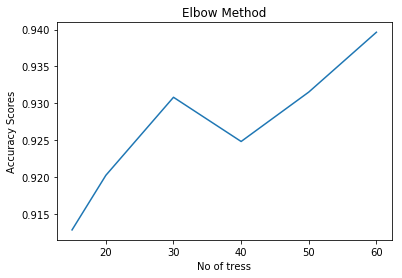

In [131]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
params = [15, 20, 25, 30, 40, 50, 60]
cv_scores = []
for i in params:
    model_rf = RandomForestClassifier(n_estimators = i, oob_score = True)
    model_rf.fit(train_data, train_label)
    score = model_rf.oob_score_
    cv_scores.append(score)
print(cv_scores)
optimal_n = params[cv_scores.index(max(cv_scores))]
print("Optimal No of tress: ", optimal_n)
plt.plot(params, cv_scores)
plt.xlabel("No of tress")
plt.ylabel("Accuracy Scores")
plt.title("Elbow Method")
plt.show()

**RandomForestClassifier with optimal Hyper parameters**

In [145]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

model_rf = RandomForestClassifier(n_estimators = 60, n_jobs = -1)
model_rf.fit(train_data, train_label)
pred = model_rf.predict(test_data)

# Calculate Confusion matrix
mat = confusion_matrix(test_label, pred)
print("Confusion Matrix\n", mat)
tn, fp, fn, tp = mat.ravel()
print("True Negative: ", tn)
print("Flase Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print('*' * 100)
# Calculate Precision Score
pre = precision_score(test_label, pred, pos_label = 'True', average = 'binary')
print('Precision for optimal Parameters is: ', pre)
print('*' * 100)
# Calculate Recall Score
rec = recall_score(test_label, pred, pos_label = 'True', average = 'binary')
print('Recall Score for optimal Parameters is: ', rec)
print('*' * 100)
# Calculate f1 Score
f1 = f1_score(test_label, pred, pos_label = 'True', average = 'binary')
print('f1 Score for Optimal Parameters is: ', f1)
acc = accuracy_score(test_label,pred)
print('*' * 100)
print("Accuracy for Otimal Parameters is: ", acc)

Confusion Matrix
 [[422   0]
 [ 25  53]]
True Negative:  422
Flase Positive:  0
False Negative:  25
True Positive:  53
****************************************************************************************************
Precision for optimal Parameters is:  1.0
****************************************************************************************************
Recall Score for optimal Parameters is:  0.6794871794871795
****************************************************************************************************
f1 Score for Optimal Parameters is:  0.8091603053435115
****************************************************************************************************
Accuracy for Otimal Parameters is:  0.95


**Observations**

1. RandomForest Classifier works better than KNN and SVC RBF Kernel with balanced dataset.
2. 95% of times model predicted correctly. 'False' values are predicted correctly but 25 out of 78 'True' values are predicted wrongly

**Random Forest Classifier with balanced dataset**

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[0.9711042311661506, 0.9814241486068112, 0.9859649122807017, 0.9876160990712074, 0.9909184726522188, 0.9892672858617131, 0.9890608875128999, 0.9905056759545924]
Optimal No of tress:  30


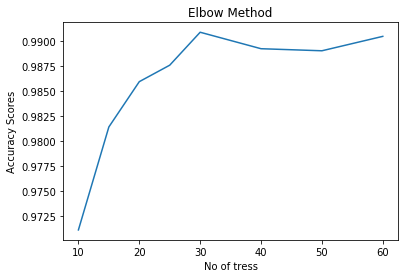

In [146]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
params = [10,15, 20, 25, 30, 40, 50, 60]
cv_scores = []
for i in params:
    model_rf_bal = RandomForestClassifier(n_estimators = i, oob_score = True)
    model_rf_bal.fit(train_data_bal, train_label_bal)
    score = model_rf_bal.oob_score_
    cv_scores.append(score)
print(cv_scores)
optimal_n = params[cv_scores.index(max(cv_scores))]
print("Optimal No of tress: ", optimal_n)
plt.plot(params, cv_scores)
plt.xlabel("No of tress")
plt.ylabel("Accuracy Scores")
plt.title("Elbow Method")
plt.show()


In [149]:
model_rf_bal = RandomForestClassifier(n_estimators = 30, n_jobs = -1)
model_rf_bal.fit(train_data_bal, train_label_bal)
pred = model_rf_bal.predict(test_data_bal)

# Calculate Confusion matrix
mat = confusion_matrix(test_label_bal, pred)
print("Confusion Matrix\n", mat)
tn, fp, fn, tp = mat.ravel()
print("True Negative: ", tn)
print("Flase Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print('*' * 100)
# Calculate Precision Score
pre = precision_score(test_label_bal, pred, pos_label = 'True', average = 'binary')
print('Precision for optimal Parameters is: ', pre)
print('*' * 100)
# Calculate Recall Score
rec = recall_score(test_label_bal, pred, pos_label = 'True', average = 'binary')
print('Recall Score for optimal Parameters is: ', rec)
print('*' * 100)
# Calculate f1 Score
f1 = f1_score(test_label_bal, pred, pos_label = 'True', average = 'binary')
print('f1 Score for Optimal Parameters is: ', f1)
acc = accuracy_score(test_label_bal,pred)
print('*' * 100)
print("Accuracy for Otimal Parameters is: ", acc)

Confusion Matrix
 [[434   5]
 [  3 413]]
True Negative:  434
Flase Positive:  5
False Negative:  3
True Positive:  413
****************************************************************************************************
Precision for optimal Parameters is:  0.9880382775119617
****************************************************************************************************
Recall Score for optimal Parameters is:  0.9927884615384616
****************************************************************************************************
f1 Score for Optimal Parameters is:  0.9904076738609113
****************************************************************************************************
Accuracy for Otimal Parameters is:  0.9906432748538012


**Observations**

1. Random Forest Classifier predicts 99.1% of times predicted correctly like SVC RBF Kernel

**Feature Importance**

In [163]:
feature_imp = model_rf_bal.feature_importances_
#Sort the features
feature_sort = feature_imp.argsort()
#Sort in descending order
feature_descending = feature_sort[::-1]
top_10_features = np.take(df_bal.columns, feature_descending[:10])
print("Top 10 Features:\n", top_10_features)

Top 10 Features:
 Index(['CustServ Calls', 'Day Mins', 'Day Charge', 'Int'l Plan', 'Eve Charge',
       'Eve Mins', 'Intl Mins', 'Intl Charge', 'Night Charge', 'Intl Calls'],
      dtype='object')


**Horizontal Bar Plot for feature Importances**

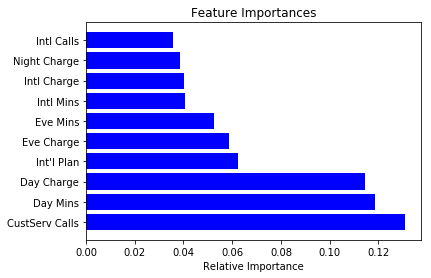

In [175]:
plt.title('Feature Importances')
plt.barh(range(len(feature_descending[:10])), feature_imp[feature_descending[:10]], color='b', align='center')
plt.yticks(range(len(feature_descending[:10])), [df_bal.columns[i] for i in feature_descending[:10]])
plt.xlabel('Relative Importance')
plt.show()

**Function to predict the Churn of a Customer for given customized input**

In [169]:
def shooter(customized_input):
    pred = model_rf_bal.predict(customized_input)
    return pred
    
prediction = shooter(churn_array_balance[40].reshape(1,-1))
print("Churn Prediction of a customer for given customized input: ", prediction)

Churn Prediction of a customer for given customized input:  ['False']


**Summary**
1. Imabalnced datasets affect model performances,most Importantly for KNN model.
2. Random Forest and SVC with RBF Kernel performed better than KNN Base model.
3. Feature Importances are obatined for Random Forest model.
4. Customized function to predict churn of a customer for given set of input parameters.
5. 99% of times Model Predictions are correct.